In [1]:
import os
import pandas as pd
s='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('from url:',s)

from url: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [2]:
df=pd.read_csv(s,header=None,encoding='utf-8')
df.tail() #last five lines of iris dataset

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'

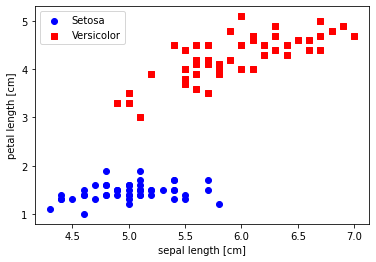

In [9]:
import matplotlib.pyplot as plt
import numpy as np
#1. extract first 100 class labels correspond o=to 50 setosa and 50 versicolor
#convert these labels to 1(versicolor),0(setosa)
y=df.iloc[0:100,4].values #index 4 has values of labels itself
print(df) #full data frame
print(y) #just the labels
y=np.where(y=='Iris-setosa',0,1)
print(y) #labels after 0-1 coversion
#extract only the sepal length and petal length
X=df.iloc[0:100,[0,2]].values
print(X) #values of 0th column and 2th column-- sepa length &petal length
#plot the data
plt.scatter(X[:50,0],X[:50,1],color='blue', marker='o',label='Setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='red',marker='s',label='Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()



You could see that if sl, pl are high then versicolor and sl,pl low then setosa. Clear binary classification possible using just two features

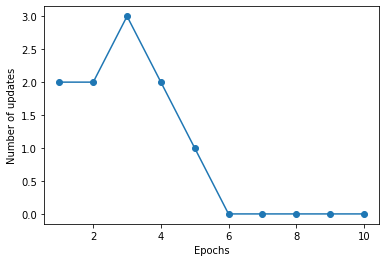

In [11]:
from perceptron import Perceptron
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [14]:
#visualizing the decision boundaries for 2-d dataset
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=('o','s','^','v','<')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    #setting up marker generator and color map

    #plotting the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    lab=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    lab=lab.reshape(xx1.shape)
    plt.contourf(xx1,xx2,lab,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #plot class examples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1], alpha=0.8, c=colors[idx],marker=markers[idx],label=f'Class {cl}',edgecolor='black')
        

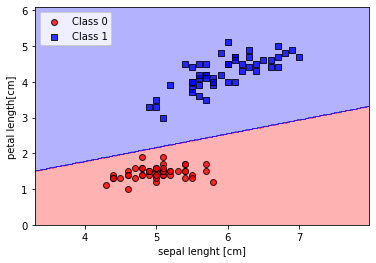

In [16]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

Since the classes can be perfectly classified by a linear decision boundary, the percepr=tron could converge. Else usually, perceptron had convergence issues. If two classes cannot be seperated by a linear hyperpalne then the weights keep on updating. Mathematically proven by rosenblatt 
https://sebastianraschka.com/pdf/lecture-notes/stat453ss21/L03_perceptron_slides.pdf.